In [7]:
import pandas as pd
import numpy as np
import seaborn as sn
from sklearn.linear_model import LogisticRegression #for sigmoid function 

In [3]:
#import dataset
df = pd.read_csv("claimants.csv")
df

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038
...,...,...,...,...,...,...,...
1335,34100,1,0.0,1.0,0.0,NaN,0.576
1336,34110,0,1.0,1.0,0.0,46.0,3.705
1337,34113,1,1.0,1.0,0.0,39.0,0.099
1338,34145,0,1.0,0.0,0.0,8.0,3.177


In [4]:
df.info

<bound method DataFrame.info of       CASENUM  ATTORNEY  CLMSEX  CLMINSUR  SEATBELT  CLMAGE    LOSS
0           5         0     0.0       1.0       0.0    50.0  34.940
1           3         1     1.0       0.0       0.0    18.0   0.891
2          66         1     0.0       1.0       0.0     5.0   0.330
3          70         0     0.0       1.0       1.0    31.0   0.037
4          96         1     0.0       1.0       0.0    30.0   0.038
...       ...       ...     ...       ...       ...     ...     ...
1335    34100         1     0.0       1.0       0.0     NaN   0.576
1336    34110         0     1.0       1.0       0.0    46.0   3.705
1337    34113         1     1.0       1.0       0.0    39.0   0.099
1338    34145         0     1.0       0.0       0.0     8.0   3.177
1339    34153         1     1.0       1.0       0.0    30.0   0.688

[1340 rows x 7 columns]>

In [5]:
df.describe()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
count,1340.000000,1340.000000,1328.000000,1299.000000,1292.000000,1151.000000,1340.000000
mean,11202.001493,0.488806,0.558735,0.907621,0.017028,28.414422,3.806307
std,9512.750796,0.500061,0.496725,0.289671,0.129425,20.304451,10.636903
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4177.000000,0.000000,0.000000,1.000000,0.000000,9.000000,0.400000
50%,8756.500000,0.000000,1.000000,1.000000,0.000000,30.000000,1.069500
75%,15702.500000,1.000000,1.000000,1.000000,0.000000,43.000000,3.781500
max,34153.000000,1.000000,1.000000,1.000000,1.000000,95.000000,173.604000


In [8]:
#droping Casenum beacause we dont have use fit

In [13]:
df.drop(["CASENUM"], axis = 1, inplace = True)

In [14]:
df #in this dataset out target value is ATTORNEY that is our y and rest are individual variable that are x.

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0,0.0,1.0,0.0,50.0,34.940
1,1,1.0,0.0,0.0,18.0,0.891
2,1,0.0,1.0,0.0,5.0,0.330
3,0,0.0,1.0,1.0,31.0,0.037
4,1,0.0,1.0,0.0,30.0,0.038
...,...,...,...,...,...,...
1335,1,0.0,1.0,0.0,NaN,0.576
1336,0,1.0,1.0,0.0,46.0,3.705
1337,1,1.0,1.0,0.0,39.0,0.099
1338,0,1.0,0.0,0.0,8.0,3.177


In [17]:
df.isna().sum()

ATTORNEY      0
CLMSEX       12
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

In [22]:
df = df.dropna() #To drop null value 

In [23]:
df.isna().sum()

ATTORNEY    0
CLMSEX      0
CLMINSUR    0
SEATBELT    0
CLMAGE      0
LOSS        0
dtype: int64

In [24]:
#check shpe of data 
# how many rows and columns are present in our dataset
df.shape

(1096, 6)

In [26]:
#Till here we did data cleaning and everything once our data  will clean then we have to proceed further to train our data 

In [31]:
#Dividing dataset into 2 part x and y
X = df.iloc[:,1:]
Y = df.iloc[:,0]
X

,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0.0,1.0,0.0,50.0,34.940
1,1.0,0.0,0.0,18.0,0.891
2,0.0,1.0,0.0,5.0,0.330
3,0.0,1.0,1.0,31.0,0.037
4,0.0,1.0,0.0,30.0,0.038
...,...,...,...,...,...
1334,1.0,1.0,0.0,16.0,0.060
1336,1.0,1.0,0.0,46.0,3.705
1337,1.0,1.0,0.0,39.0,0.099
1338,1.0,0.0,0.0,8.0,3.177


In [34]:
#Going to apply method 
classifier = LogisticRegression()
classifier.fit(X,Y) #fit is used to tarin model 

LogisticRegression()

In [37]:
#predect Y
Y_predit = classifier.predict(X)
Y_predit

array([0, 1, 1, ..., 1, 0, 1], dtype=int64)

In [39]:
#so our y predit in form of array we will convert it into datafram 
Y_predit_df = pd.DataFrame({'actual': Y,
                         'predicted_prob': classifier.predict(X)})
Y_predit_df

,actual,predicted_prob
0,0,0
1,1,1
2,1,1
3,0,0
4,1,1
...,...,...
1334,1,1
1336,0,0
1337,1,1
1338,0,0


In [44]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y,Y_predit)
confusion_matrix

array([[381, 197],
       [123, 395]], dtype=int64)

In [47]:
#Classification report(Means all accuracy and evelvaluion result)
from sklearn.metrics import classification_report
print(classification_report(Y, Y_predit))

              precision    recall  f1-score   support

           0       0.76      0.66      0.70       578
           1       0.67      0.76      0.71       518

    accuracy                           0.71      1096
   macro avg       0.71      0.71      0.71      1096
weighted avg       0.71      0.71      0.71      1096



In [51]:
#ROc: Reciver operator charecterstic
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score #ROC curve is between FPR and TPR

Text(0, 0.5, 'True Positive Rate')

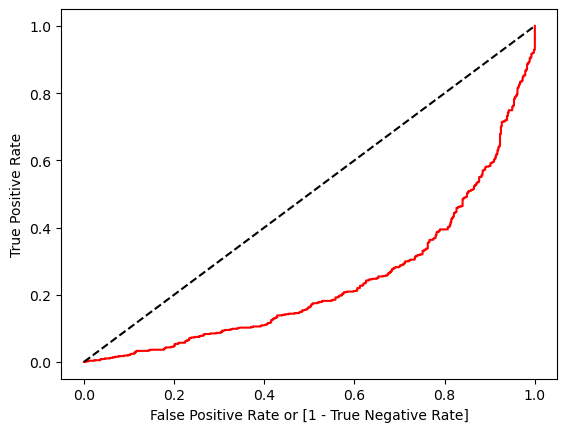

In [59]:
TPR, FPR, thresolds = roc_curve(Y, classifier.predict_proba(X)[:,1])
auc = roc_auc_score(Y, Y_predit)

import matplotlib.pyplot as plt

plt.plot(FPR, TPR, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

In [60]:
auc

0.7108589063606365

In [78]:
#Method 2 to devide our dataset into 2 parts tarin and test 

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size= 0.20, random_state =42) #here we are deviding our dataset into 8- and 20 ration

In [80]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((876, 5), (220, 5), (876,), (220,))

In [81]:
#After that everything will be same as it is above 
classifier = LogisticRegression()
classifier.fit(X_train,Y_train)

LogisticRegression()